In [1]:
%load_ext autoreload
%autoreload 2
%env PYDEVD_DISABLE_FILE_VALIDATION=1

env: PYDEVD_DISABLE_FILE_VALIDATION=1


In [6]:
import numpy as np
import sys
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math 

#from noise_generator import  stack_noise #, interp_stack_noise, interp_dict_noise
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math 
import os
from tqdm.auto import tqdm

from copy import deepcopy
# import sys
# sys.path.append('~/Dropbox/PJ ModelDetection/DREM/DREM_implementation/Cpp_lib')
# import adjugate_module
#sys.path.append('Cpp_lib')
#import adjugate_module

In [7]:
from model.one_d_dynamics import FTC_DREM_Estimator

# time setting
T0 = 0.0
T1 = 40.0
N = 2000
t_span = (T0, T1)  # Time from 0 to 40 seconds
t_list = np.linspace(T0, T1, N+1)

In [247]:
# wrappper to iterate experiments
def compute_ftc_result(ftc_class):
    time, theta, w = ftc_class.solve(t_span, t_eval=t_list)
    
    true_theta = ftc_class.true_parameters_list(time)
    
    theta_FTC = ftc_class.compute_FTC_Est(time, theta, w)

    res = {'time': time,
           'theta': theta,
           'w': w,
           'true_theta': true_theta,
           'theta_FTC': theta_FTC,
    }

    return res


New Results on Parameter Estimation via Dynamic Regressor Extension and Mixing: Continuous and Discrete-time Cases
Romeo Ortega, Fellow, IEEE, Stanislav Aranovskiy, Senior member, IEEE, Anton A. Pyrkin, Member, IEEE, Alessandro Astolfi, Fellow, IEEE, Alexey A. Bobtsov, Senior member, IEEE

## Section VI. SIMULATIONS

### B. Aleartness preserving DREM with FTC of Proposition 7

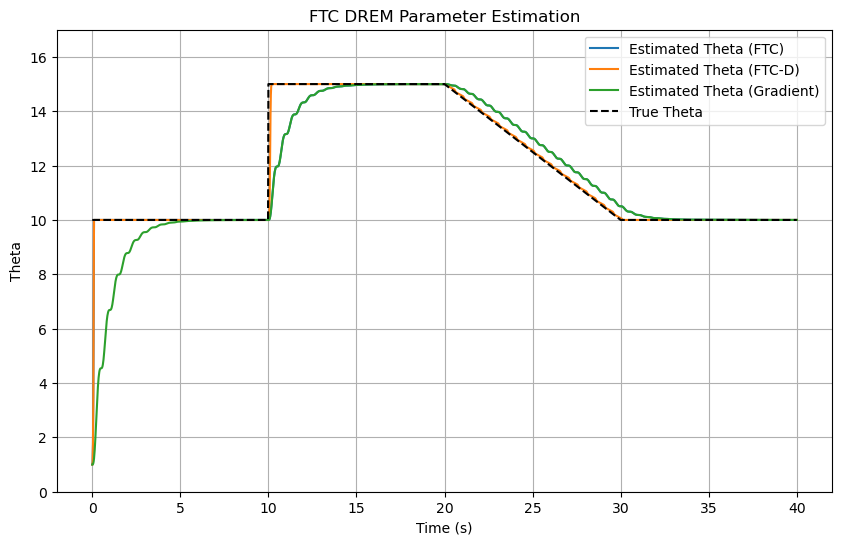

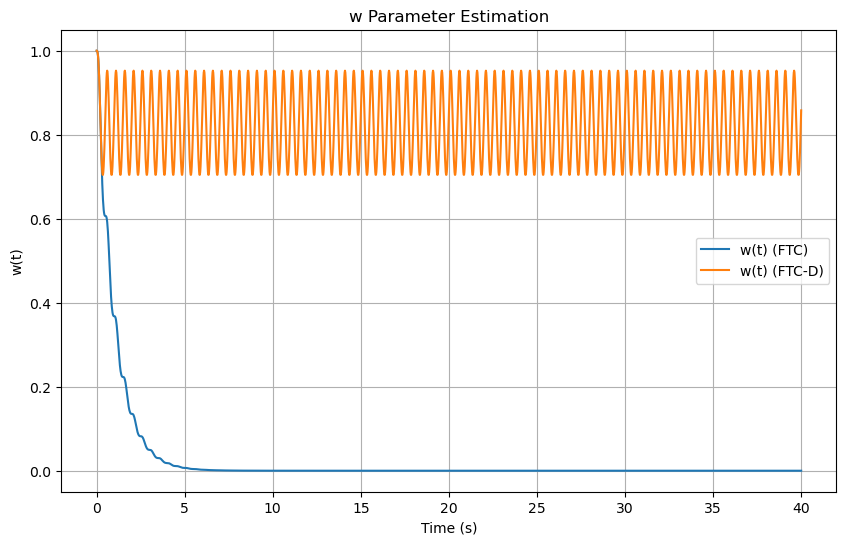

In [262]:


# not_in_L2_case
ftc_d_drem_PE = FTC_DREM_Estimator(initial_theta=[1.0], gamma=2.0, mu=0.98, mode='FTC-D', TD=0.2, delta_mode='PE', sigma_o=0.00)
ftc_drem_PE = FTC_DREM_Estimator(initial_theta=[1.0], gamma=2.0, mu=0.98, mode='FTC', TD=0.2, delta_mode='PE', sigma_o=0.0)

#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_drem)
res1 = compute_ftc_result(ftc_drem_PE)
#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_d_drem)
res2 = compute_ftc_result(ftc_d_drem_PE)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['theta_FTC'], label='Estimated Theta (FTC)')
plt.plot(res2['time'], res2['theta_FTC'], label='Estimated Theta (FTC-D)')
plt.plot(res1['time'], res1['theta'], label='Estimated Theta (Gradient)')
plt.plot(res1['time'], res1['true_theta'], 'k--', label='True Theta')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.ylim(0, 17)
plt.title('FTC DREM Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['w'], label='w(t) (FTC)')
plt.plot(res2['time'], res2['w'], label='w(t) (FTC-D)')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('w(t)')
plt.title('w Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()


$\mu$ = 0.98

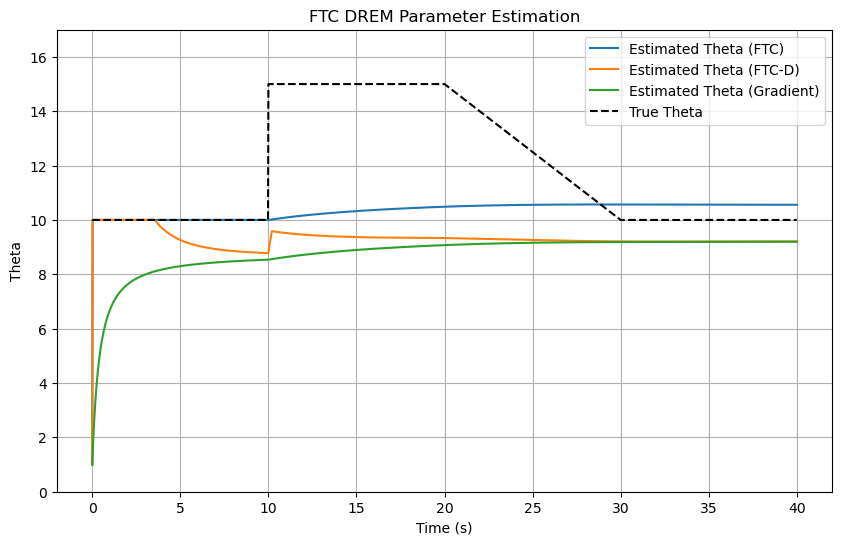

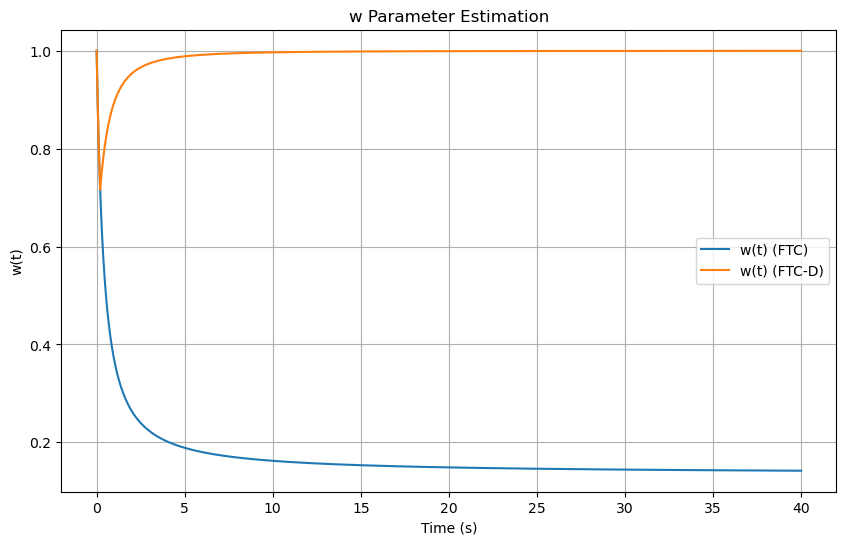

In [257]:


# not_in_L2_case
ftc_d_drem = FTC_DREM_Estimator(initial_theta=[1.0], gamma=2.0, mu=0.98, mode='FTC-D', TD=0.2, delta_mode='not_in_L2', sigma_o=0.00)
ftc_drem = FTC_DREM_Estimator(initial_theta=[1.0], gamma=2.0, mu=0.98, mode='FTC', TD=0.2, delta_mode='not_in_L2', sigma_o=0.0)


#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_drem)
res1 = compute_ftc_result(ftc_drem)
#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_d_drem)
res2 = compute_ftc_result(ftc_d_drem)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['theta_FTC'], label='Estimated Theta (FTC)')
plt.plot(res2['time'], res2['theta_FTC'], label='Estimated Theta (FTC-D)')
plt.plot(res1['time'], res1['theta'], label='Estimated Theta (Gradient)')
plt.plot(res1['time'], res1['true_theta'], 'k--', label='True Theta')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.ylim(0, 17)
plt.title('FTC DREM Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['w'], label='w(t) (FTC)')
plt.plot(res2['time'], res2['w'], label='w(t) (FTC-D)')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('w(t)')
plt.title('w Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()

$\mu$ = 0.999

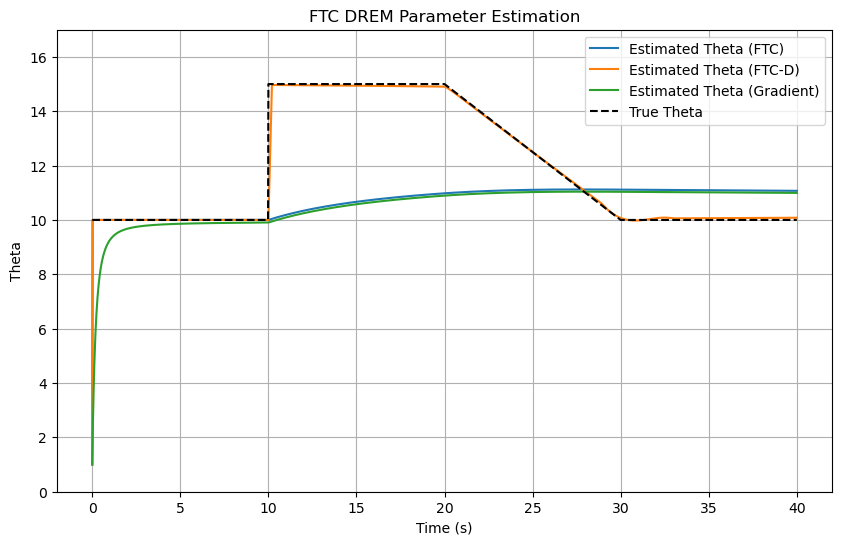

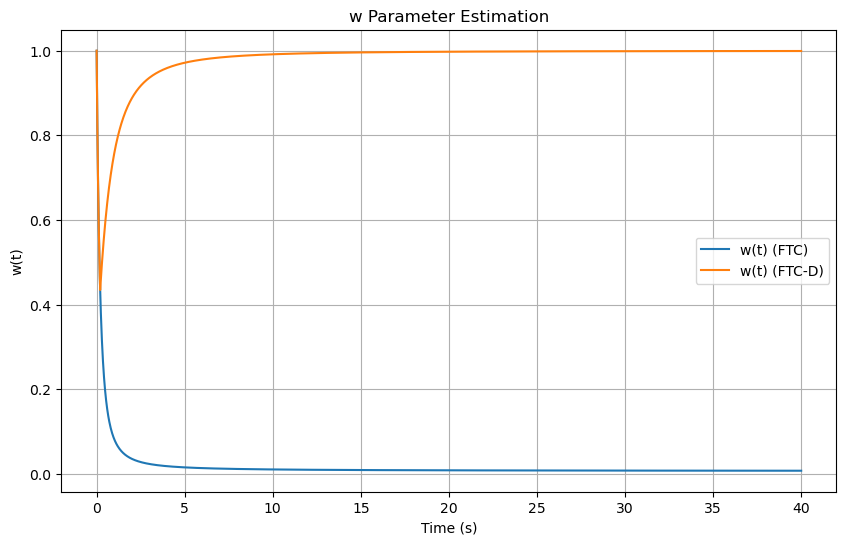

In [268]:

# not_in_L2_case
ftc_d_drem = FTC_DREM_Estimator(initial_theta=[1.0], gamma=5.0, mu=0.9999, mode='FTC-D', TD=0.2, delta_mode='not_in_L2', sigma_o=0.00)
ftc_drem = FTC_DREM_Estimator(initial_theta=[1.0], gamma=5.0, mu=0.9999, mode='FTC', TD=0.2, delta_mode='not_in_L2', sigma_o=0.0)


#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_drem)
res1 = compute_ftc_result(ftc_drem)
#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_d_drem)
res2 = compute_ftc_result(ftc_d_drem)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['theta_FTC'], label='Estimated Theta (FTC)')
plt.plot(res2['time'], res2['theta_FTC'], label='Estimated Theta (FTC-D)')
plt.plot(res1['time'], res1['theta'], label='Estimated Theta (Gradient)')
plt.plot(res1['time'], res1['true_theta'], 'k--', label='True Theta')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.ylim(0, 17)
plt.title('FTC DREM Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['w'], label='w(t) (FTC)')
plt.plot(res2['time'], res2['w'], label='w(t) (FTC-D)')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('w(t)')
plt.title('w Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()

# case if delta has some observation error
Both dtheta_dt and dw_dt get affected

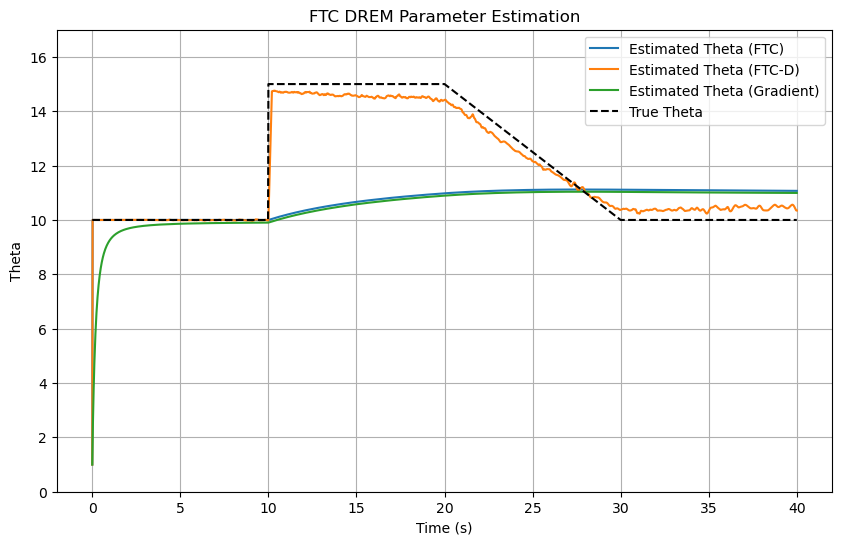

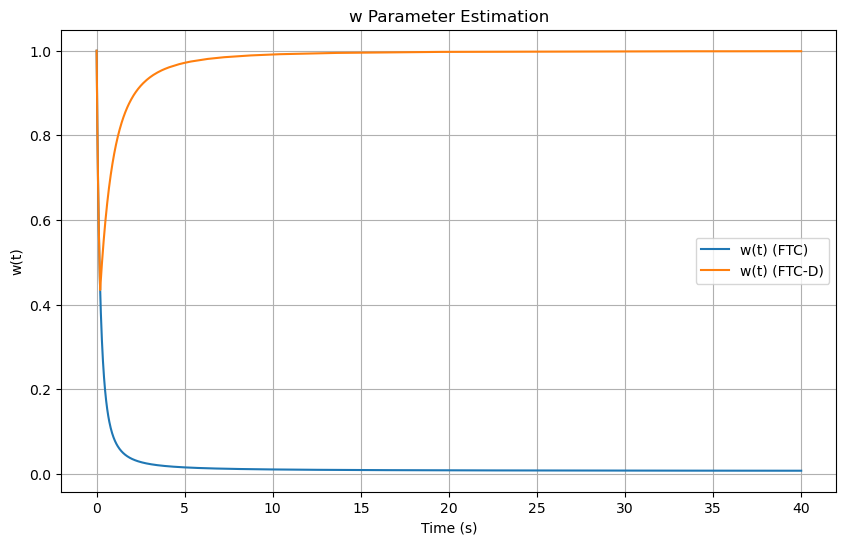

In [273]:

# not_in_L2_case
ftc_d_drem = FTC_DREM_Estimator(initial_theta=[1.0], gamma=5.0, mu=0.9999, mode='FTC-D', TD=0.2, delta_mode='not_in_L2', sigma_o=2e-4)
ftc_drem = FTC_DREM_Estimator(initial_theta=[1.0], gamma=5.0, mu=0.9999, mode='FTC', TD=0.2, delta_mode='not_in_L2', sigma_o=2e-4)


#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_drem)
res1 = compute_ftc_result(ftc_drem)
#time, theta, w, true_theta, theta_FTC = compute_ftc_result(ftc_d_drem)
res2 = compute_ftc_result(ftc_d_drem)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['theta_FTC'], label='Estimated Theta (FTC)')
plt.plot(res2['time'], res2['theta_FTC'], label='Estimated Theta (FTC-D)')
plt.plot(res1['time'], res1['theta'], label='Estimated Theta (Gradient)')
plt.plot(res1['time'], res1['true_theta'], 'k--', label='True Theta')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.ylim(0, 17)
plt.title('FTC DREM Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(res1['time'], res1['w'], label='w(t) (FTC)')
plt.plot(res2['time'], res2['w'], label='w(t) (FTC-D)')
#plt.axhline(y=10, color='r', linestyle='--', label='True Theta (10)')
#plt.axhline(y=15, color='g', linestyle='--', label='True Theta (15)')
plt.xlabel('Time (s)')
plt.ylabel('w(t)')
plt.title('w Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()